# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [96]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


605

In [97]:
#Create Empty DataFrame
label = ['CityName']
cities_df = pd.DataFrame(cities, columns=label)
cities_df['Cloudiness'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['MaxTemp'] = ""
cities_df['WindSpeed'] = ""

cities_df.head()

,CityName,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,mahebourg,,,,,,,,
1,opotiki,,,,,,,,
2,oranjestad,,,,,,,,
3,cumana,,,,,,,,
4,ngaoundere,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [98]:

base_url = "http://api.openweathermap.org/data/2.5/weather?"
params = {'appid': "722ddfac6712dcd0d91d1f72617f8ce1" , 
          'q' : city, 
          'units' : 'imperial'
}

# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():

    # get restaurant type from df
    city = row['CityName']

    # add keyword to params dict
    params['q'] = city

    # assemble url and make API request

    response = requests.get(base_url, params=params).json()
    
    # extract results
#    results = response['results']
    
    try:
        print(f"Getting Data for {response['name']}, {response['sys']['country']} where the current tempature is {response['main']['temp_max']} degrees F...")
        cities_df.loc[index, 'CityName'] = response['name']
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'MaxTemp'] = response['main']['temp_max']
        cities_df.loc[index, 'WindSpeed'] = response['wind']['speed']        
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")

    
cities_df.head()

Getting Data for Mahebourg, MU where the current tempature is 78.8 degrees F...
------------
Getting Data for Opotiki, NZ where the current tempature is 62.42 degrees F...
------------
Getting Data for Oranjestad, AW where the current tempature is 84.2 degrees F...
------------
Getting Data for Cumana, VE where the current tempature is 87.76 degrees F...
------------
Getting Data for Ngaoundere, CM where the current tempature is 72.5 degrees F...
------------
Getting Data for Punta Arenas, CL where the current tempature is 59 degrees F...
------------
Missing field/result... skipping.
------------
Getting Data for Mataura, NZ where the current tempature is 49.82 degrees F...
------------
Getting Data for Finschhafen, PG where the current tempature is 72.23 degrees F...
------------
Getting Data for Honningsvag, NO where the current tempature is 30.2 degrees F...
------------
Getting Data for Severo-Kurilsk, RU where the current tempature is 25.21 degrees F...
------------
Getting Data 

Getting Data for Candolim, IN where the current tempature is 80.6 degrees F...
------------
Missing field/result... skipping.
------------
Getting Data for Kropotkin, RU where the current tempature is 32.68 degrees F...
------------
Getting Data for Craig, US where the current tempature is 28.94 degrees F...
------------
Missing field/result... skipping.
------------
Getting Data for Askiz, RU where the current tempature is -8.5 degrees F...
------------
Getting Data for Ilulissat, GL where the current tempature is 10.4 degrees F...
------------
Missing field/result... skipping.
------------
Getting Data for New Norfolk, AU where the current tempature is 55.4 degrees F...
------------
Getting Data for Nizwa, OM where the current tempature is 58.33 degrees F...
------------
Getting Data for Whitehorse, CA where the current tempature is 35.6 degrees F...
------------
Getting Data for Georgetown, GY where the current tempature is 84.2 degrees F...
------------
Getting Data for Harper, US 

Getting Data for Tanushimaru, JP where the current tempature is 42.8 degrees F...
------------
Getting Data for Hovd, NO where the current tempature is 37.4 degrees F...
------------
Missing field/result... skipping.
------------
Getting Data for Luderitz, NA where the current tempature is 63.55 degrees F...
------------
Getting Data for Grindavik, IS where the current tempature is 35.6 degrees F...
------------
Getting Data for Leningradskiy, RU where the current tempature is -3.96 degrees F...
------------
Getting Data for Brae, GB where the current tempature is 35.6 degrees F...
------------
Getting Data for Nishihara, JP where the current tempature is 44.6 degrees F...
------------
Getting Data for Phitsanulok, TH where the current tempature is 70.7 degrees F...
------------
Getting Data for Te Anau, NZ where the current tempature is 46.45 degrees F...
------------
Getting Data for The Valley, AI where the current tempature is 86 degrees F...
------------
Getting Data for Nelson Ba

Getting Data for Chuy, UY where the current tempature is 81.73 degrees F...
------------
Missing field/result... skipping.
------------
Getting Data for Thinadhoo, MV where the current tempature is 82.18 degrees F...
------------
Getting Data for Dandong, CN where the current tempature is -2.25 degrees F...
------------
Getting Data for Sur, OM where the current tempature is 76.69 degrees F...
------------
Getting Data for Inisa, NG where the current tempature is 85.33 degrees F...
------------
Getting Data for Paraiso, MX where the current tempature is 51.8 degrees F...
------------
Getting Data for Shepsi, RU where the current tempature is 57.83 degrees F...
------------
Getting Data for Katsuura, JP where the current tempature is 38.48 degrees F...
------------
Getting Data for Cobija, BR where the current tempature is 87.8 degrees F...
------------
Getting Data for Iqaluit, CA where the current tempature is -2.21 degrees F...
------------
Missing field/result... skipping.
---------

Getting Data for Rock Springs, US where the current tempature is 17.96 degrees F...
------------
Getting Data for Kiunga, PG where the current tempature is 73.36 degrees F...
------------
Getting Data for Port Augusta, AU where the current tempature is 62.6 degrees F...
------------
Getting Data for Ojinaga, US where the current tempature is 51.98 degrees F...
------------
Getting Data for Ponnampet, IN where the current tempature is 66.07 degrees F...
------------
Getting Data for Abalak, NE where the current tempature is 70.07 degrees F...
------------
Getting Data for Cockburn Town, TC where the current tempature is 80.92 degrees F...
------------
Getting Data for Ulladulla, AU where the current tempature is 66.34 degrees F...
------------
Getting Data for Pleshanovo, RU where the current tempature is 35.6 degrees F...
------------
Getting Data for Campbellton, CA where the current tempature is 10.54 degrees F...
------------
Getting Data for Patti, IT where the current tempature is

Getting Data for Gidam, IN where the current tempature is 62.29 degrees F...
------------
Getting Data for La Puebla del Rio, ES where the current tempature is 66.2 degrees F...
------------
Getting Data for Kerema, PG where the current tempature is 72.32 degrees F...
------------
Getting Data for Cidreira, BR where the current tempature is 80.02 degrees F...
------------
Missing field/result... skipping.
------------
Getting Data for Arinos, BR where the current tempature is 66.83 degrees F...
------------
Getting Data for Vilhena, BR where the current tempature is 86 degrees F...
------------
Getting Data for Poum, MK where the current tempature is 27.23 degrees F...
------------
Getting Data for Staryy Nadym, RU where the current tempature is 16.25 degrees F...
------------
Getting Data for Saint-Augustin, FR where the current tempature is 53.6 degrees F...
------------
Missing field/result... skipping.
------------
Getting Data for Ayacucho, PE where the current tempature is 65.57 

Getting Data for Trebinje, HR where the current tempature is 50 degrees F...
------------
Getting Data for Bowen, AU where the current tempature is 73.4 degrees F...
------------
Getting Data for Kavieng, PG where the current tempature is 85.1 degrees F...
------------
Getting Data for Comodoro Rivadavia, AR where the current tempature is 77 degrees F...
------------
Getting Data for Jagatsinghapur, IN where the current tempature is 66.2 degrees F...
------------
Getting Data for Phuntsholing, IN where the current tempature is 42.98 degrees F...
------------
Missing field/result... skipping.
------------
Getting Data for Fare, PF where the current tempature is 81.64 degrees F...
------------
Getting Data for Maxixe, MZ where the current tempature is 80.6 degrees F...
------------
Getting Data for Vanimo, PG where the current tempature is 81.23 degrees F...
------------
Getting Data for Neuquen, AR where the current tempature is 77 degrees F...
------------
Getting Data for Kondinskoye,

,CityName,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,Mahebourg,75,MU,1544374800,88,-20.41,57.7,78.8,8.05
1,Opotiki,0,NZ,1544377525,100,-38.01,177.29,62.42,3.69
2,Oranjestad,40,AW,1544374800,58,12.52,-70.03,84.2,23.04
3,Cumana,20,VE,1544377526,38,10.46,-64.17,87.76,4.14
4,Ngaoundere,0,CM,1544377526,41,7.32,13.58,72.5,8.61


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [125]:
#Drop Missing Values

cities_df['Cloudiness'].replace('', np.nan, inplace=True)
cities_df.dropna(subset=['Cloudiness'], inplace=True)

#Drop Extreme Values for Humidity, Temp
cities_df = cities_df.drop(cities_df[cities_df['Humidity'] > 150].index)
cities_df = cities_df.drop(cities_df[cities_df['MaxTemp'] > 150].index)


#Print to CSV file and save
cities_df.to_csv("../CityData.csv", sep='\t', encoding='utf-8')

,CityName,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,Urengoy,92.0,RU,1544375939,85,65.96,78.37,14.32,7.61
1,Khatanga,68.0,RU,1544375940,71,71.98,102.47,-10.26,9.95
2,Yellowknife,20.0,CA,1544371200,92,62.45,-114.38,14,4.7
3,Lubango,20.0,AO,1544374800,45,-14.92,13.49,77,4.7
4,New Norfolk,40.0,AU,1544374800,82,-42.78,147.06,57.2,5.82
5,Saint-Philippe,90.0,CA,1544374800,79,45.36,-73.48,28.4,9.17
6,Hermanus,0.0,ZA,1544375941,67,-34.42,19.24,63.01,4.81
7,Hobart,40.0,AU,1544373000,87,-42.88,147.33,55.4,5.82
8,Ostrovnoy,80.0,RU,1544375942,94,68.05,39.51,26.47,15.77
9,Caohai,24.0,CN,1544375942,82,26.87,104.28,29.26,1.45


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

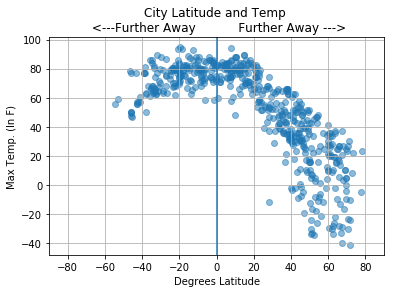

In [126]:
#Plot Each city as a scatter plot, between Latitude and Max Temp

plt.scatter(cities_df['Lat'], cities_df['MaxTemp'], alpha = .5)
plt.grid()
plt.title('City Latitude and Temp \n <---Further Away           Further Away --->')
plt.xlabel('Degrees Latitude')
plt.ylabel('Max Temp. (In F)')
plt.axvline(x = 0)
plt.xlim(-90,90)
plt.savefig('Temp_Lat.png', bbox_inches='tight')

#### Latitude vs. Humidity Plot

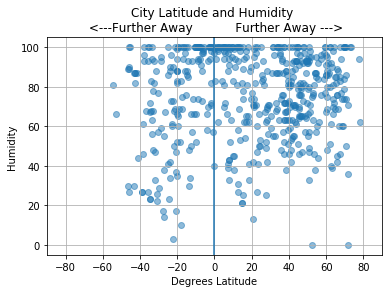

In [127]:
#Plot Each city as a scatter plot, between Latitude and Humidity

plt.scatter(cities_df['Lat'], cities_df['Humidity'], alpha = .5)
plt.grid()
plt.title('City Latitude and Humidity \n <---Further Away           Further Away --->')
plt.xlabel('Degrees Latitude')
plt.ylabel('Humidity')
plt.axvline(x = 0)
plt.xlim(-90,90)
plt.savefig('Hum_Lat.png', bbox_inches='tight')

#### Latitude vs. Cloudiness Plot

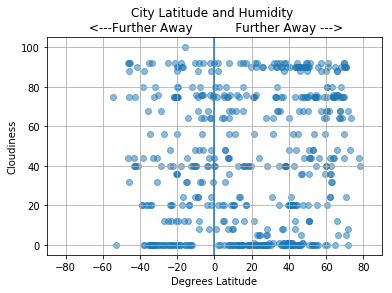

In [128]:
#Plot Each city as a scatter plot, between Latitude and Cloudiness

plt.scatter(cities_df['Lat'], cities_df['Cloudiness'], alpha = .5)
plt.grid()
plt.title('City Latitude and Humidity \n <---Further Away           Further Away --->')
plt.xlabel('Degrees Latitude')
plt.ylabel('Cloudiness')
plt.axvline(x = 0)
plt.xlim(-90,90)
plt.savefig('Cloud_Lat.png', bbox_inches='tight')

#### Latitude vs. Wind Speed Plot

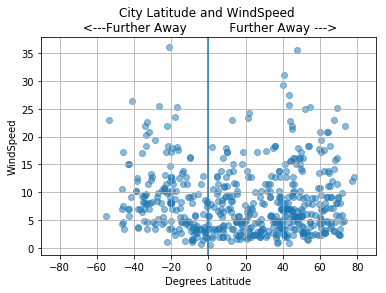

In [129]:
#Plot Each city as a scatter plot, between Latitude and Windspeed

plt.scatter(cities_df['Lat'], cities_df['WindSpeed'], alpha = .5)
plt.grid()
plt.title('City Latitude and WindSpeed \n <---Further Away           Further Away --->')
plt.xlabel('Degrees Latitude')
plt.ylabel('WindSpeed')
plt.axvline(x = 0)
plt.xlim(-90,90)
plt.savefig('Wind_Lat.png', bbox_inches='tight')

In [130]:
countries = cities_df[['Country', 'Lat', 'MaxTemp']]
countries['Lat'] = countries['Lat'].astype(int)
countries['MaxTemp'] = countries['MaxTemp'].astype(int)
countries.dtypes
countries_grouped = countries.groupby('Country').mean()

/Users/gregpoppe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/gregpoppe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


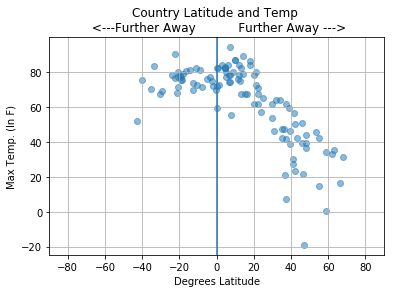

In [131]:
#Plot Each city as a scatter plot, between Latitude and Max Temp

plt.scatter(countries_grouped['Lat'], countries_grouped['MaxTemp'], alpha = .5)
plt.grid()
plt.title('Country Latitude and Temp \n <---Further Away           Further Away --->')
plt.xlabel('Degrees Latitude')
plt.ylabel('Max Temp. (In F)')
plt.axvline(x = 0)
plt.xlim(-90,90)
plt.savefig('CountryTemp_Lat.png', bbox_inches='tight')